# INF 8215 - Intelligence artif.: méthodes et algorithmes 
## Automne 2018 - TP3 - Machine Learning

**Date de rendu: 6 Décembre**

**Fichiers à rendre:**
    * TP3_FR.ipynb complété
    * SoftmaxClassifier.py complété
    * test_prediction.csv le fichier de résultat

## Introduction

Le but de ce TP est de vous donner un aperçu du déroulement général d'un projet de machine learning tout en vous familiarisant avec des librairies python adaptées.


Dans la première partie, vous implémenterez un algorithme de classification multiclasse appelé **softmax regression** à l'aide uniquement de la bibliothèque **numpy** et l'intégrerez à la bibliothèque **scikit-learn**.

Dans la deuxième partie, vous prendrez connaissance du **dataset** utilisé pour ce projet. Et vous serez amenés à effectuer le **preprocessing** de ces données pour qu'elles soient utilisables dans les algorithmes de machine learning classiques. Vous utiliserez les bibliothèques **pandas** et **scikit-learn**.

Enfin, dans la troisième partie, vous comparerez l'efficacité du modèle que vous avez implémenté avec d'autres modèles déjà implémentés dans **sklearn**. Puis vous tenterez d'améliorer les performances de l'algorithme sélectionné.

Pour enfin soumettre vos résultats sur la plateforme **kaggle**.

## Installation

Pour installer **pandas** et **scikit-learn** le plus simple est de télécharger et d'installer **Anaconda** qui regroupe les packages les plus utilisés pour le calcul scientifique et la science des données.

Vous trouverez la distribution ici : https://www.anaconda.com/download/#linux .

Assurez-vous d'avoir la version **20.0** de **scikit-learn**.

## Bonus 1: Compétition (2 points)

Quand vous aurez terminé le TP, vous pourrez soumettre vos prédictions sur **kaggle**, vous obtiendrez votre performance en terme de **log loss**.
Vous pouvez ensuite me communiquer ce résultat par mail (laurent.boucaud@polymtl.ca) et me joindre votre fichier de prédiction sur l'ensemble de test(pour vérification).

Une conversation dans le forum sera créée pour tenir à jour le meilleur score obtenu par une des équipes du cours.

Tant qu'aucun forum n'est créé, **ne m'envoyez pas vos performances si elles sont supérieures à 0.8 de log loss**.

Une fois le premier meilleur score affiché dans le forum, **ne me communiquez vos résultats que si votre log loss est inférieure au précédent meilleur score**.

Le nombre de points obtenus sera proportionnel au classement des équipes.

# 1. Softmax Regression (10 points)

Dans cette partie vous implémenterez **softmax regression** la variante de **logistic regression** qui permet d'effectuer de la classification pour un nombre de classe supérieur à 2.

Le code à compléter se trouve dans le fichier **SoftmaxClassifier.py**. 

**Pour cet exercice, la contrainte est d'utiliser uniquement la bibliothèque numpy**

## Encapsulation avec sklearn

La classe **SoftmaxClassifier** hérite des classes **BaseEstimator** et **ClassifierMixin** de **scikit-learn** ce qui nous permettra d'utiliser facilement avec notre classifier les outils fournis par scikit-learn dans la suite du TP.

Pour la compatibilité, le classifier implémente obligatoirement les méthodes:

* **fit**: responsable de l'entraînement du modèle
* **predict_proba**: permet de prédire la probabilité de chaque classe pour chaque exemple du dataset fourni.
* **predict**: permet de prédire la classe pour chaque exemple du dataset fourni.
* **score**: permet de quantifier l'écart entre les classes prédites et les classes réelles pour le dataset fourni


## Train/Test set:

Quand on veut tester les performances de l'apprentissage d'un algorithme de machine learning, on **ne le teste pas sur les données utilisées pour l'apprentissage**.

En effet, ce qui nous intéresse c'est que notre algorithme soit **capable de généraliser** ses prédictions à des données qu'il n'a **jamais vu**.

Pour illustrer, si on teste un algorithme sur les données d'entrainement, on teste sa capacité à **apprendre par coeur** le dataset et non à **généraliser**.

Par conséquent, quand on reçoit un nouveau dataset, la première chose à faire et de le **diviser en deux parties**: un ensemble d'**entraînement** (**70-80%** du dataset) et un ensemble de **test**(**20-30%** du dataset).

Tous les algorithmes de **traitement des données** et d'apprentissage devront être appris uniquement sur l'ensemble d'entraînement et appliqués ensuite sur l'ensemble de test.

Cela garantit l'absence de connaissances préalables de l'ensemble de test lors de l'entrainement.

## Gradient descent

La descente de gradient est un algorithme qui permet trouver la solution optimale d'un certains nombre de problèmes. Le principe est le suivant: on définit une **fonction de coût J**  qui caractérise le problème.
Cette fonction dépend d'un ensemble de **paramètres $\theta$ **. La descente de gradient cherche à **minimiser** la fonction de coût en **modifiant itérativement** les paramètres.

### Gradient

Le gradient de la fonction de coûts pour un $\theta$ donné, correspond à la direction dans laquelle il faut modifier $\theta$ pour réduire la valeur de la fonction de coût. 

La fonction de coût est minimale quand le gradient est nul.

Concrètement, on initialize $\theta$ aléatoirement, et on effectue à chaque itération un pas pour réduire la fonction de coût jusqu'à convergence de l'algorithme à un minimum.

### Learning rate

Le taux d'apprentissage correspond à la taille du pas que l'on va effectuer dans la direction du gradient.
Plus il est grand, plus la convergence est rapide mais il y a un risque que l'algorithme diverge.

Plus il est petit, plus la convergence est lente.

### Batch gradient descent

Il existe plusieurs algorithmes de descente de gradient. Nous utiliserons Batch gradient descent.

Dans cet algorithme, avant de mettre à jour $\theta$, on calcule les gradients sur l'ensemble des exemples d'entraînement.

### Epoch

Il s'agit d'un pas de la descente de gradient, soit une unique mise à jour de gradient.

### Bias/Variance tradeoff

Lorsqu'on entraine un algorithme de machine learning on cherche un équilibre entre **biais** et **variance**.

Un modèle avec un **biais fort**, est un modèle qui est **trop simple** pour la structure donnée considérée (modèle linéaire pour données quadratiques), cela limite la capacité du modèle à généraliser. On appelle aussi le biais **underfitting**.

Un modèle avec une **variance élevée** signifie qu'il est sensible aux petites variations dans les données d'entrainement, cela correspond à l'**overfitting**, c'est-à-dire que le modèle est trop proche de la structure de l'ensemble d'entrainement ce qui **limite sa capacité à généraliser**.

Un modèle avec un **biais important** aura une **mauvaise performance** sur l'ensemble d'**entraînement**.
Un modèle avec une **variance importante** aura une performance bien **moins bonne** sur l'ensemble de **test** que sur l'ensemble d'**entrainement**.


### One-hot-encoding

En machine learning pour représenter un vecteur de données catégoriques, on utilise le one-hot encoding.

Pour un vecteur comportant 5 exemples et 3 catégories différentes, on le représente sous forme d'une matrice de taille 5 par 3. Cette matrice est entièrement remplie de 0 sauf à l'indice correspondant au numéro de la classe pour chaque exemple.


Par exemple
$ y = \left(\begin{array}{cc} 
1 \\
1 \\
2 \\
3 \\
2 \\
\end{array}\right) $

devient:

$ yohe =  \left(\begin{array}{cc} 
1. & 0. & 0.\\
1. & 0. & 0.\\
0. & 1. & 0.\\
0. & 0. & 1.\\
0. & 1. & 0.\\
\end{array}\right) $


#### Question 1 (1 point)
Implémentez  la fonction  **_one_hot**  dans SoftmaxClassifier.py

In [93]:
import SoftmaxClassifier as sc
import numpy as np

sc = sc.SoftmaxClassifier()

X = np.array([1, 1, 2, 5, 2, 10]).reshape(2,3)

# on fait des classes arbitraires
y = np.array([1, 2])

sc.fit(X, y)

y_one_hot = sc._one_hot(y)

print(y_one_hot)

0
3.459774270902119
1
2.5110493949233987
diff=
0.9487248759787201
2
1.3994890844655061
diff=
1.1115603104578926
3
0.8921513645581107
diff=
0.5073377199073954
4
0.693135261183517
diff=
0.19901610337459374
5
0.5652101105749927
diff=
0.12792515060852427
6
0.4825377426779134
diff=
0.08267236789707932
7
0.4288108619540114
diff=
0.05372688072390197
8
0.39352687255156815
diff=
0.03528398940244326
9
0.37005897617824873
diff=
0.02346789637331942
10
0.35413974527531744
diff=
0.01591923090293129
11
0.34307021376536284
diff=
0.0110695315099546
12
0.3351159807999828
diff=
0.00795423296538006
13
0.32917639521911457
diff=
0.005939585580868212
14
0.3245456016372903
diff=
0.004630793581824277
15
0.32077412617560247
diff=
0.003771475461687823
16
0.3175738514245187
diff=
0.0032002747510837537
17
0.3147606042157567
diff=
0.0028132472087620264
18
0.3122160487531921
diff=
0.0025445554625646016
19
0.30986408354820644
diff=
0.002351965204985651
20
0.30765545437065334
diff=
0.002208629177553101
21
0.3055581083

### Matrice de poids

Soit $ X_{m * n} $ la matrice d'exemple et $ \Theta _{n*K} $ la matrice de poids avec:

* **m** le nombre d'exemples
* **n** le nombre de features
* **k** le nombre de classes

Il est d'usage d'ajouter une colonne supplémentaire à X, cette colonne est remplie de 1. Pour prendre en compte ce changement, il faut rajouter une ligne à la matrice $\Theta$.

On obtient X_bias$_{m*(n+1)}$ et $ \Theta _{(n+1)*K} $


Intuitivement, à chaque classe K est associée une colonne de $\theta$.

On note $\theta_k$ le vecteur de dimension n+1 la colonne de poids associée à la prédiction de la classe k.

$\Theta$ = [$\theta_0$,$\theta_1$... $\theta_k$ ... $\theta_n$ ]

Ainsi $ z = x * \Theta $ donne un vecteur de dimension K qui correspond aux **logits** associés à x pour chacune des classes.

#### Question 2 (1 point)
Dans la fonction  **fit**  dans SoftmaxClassifier.py instanciez X_bias et initialisez $\Theta$ aléatoirement. (ligne 74)

In [94]:
import SoftmaxClassifier as sc
import numpy as np

sc = sc.SoftmaxClassifier()

X = np.array([1, 1, 2, 5, 2, 10]).reshape(2,3)

# on fait des classes arbitraires
y = np.array([1, 2])

print(sc.fit(X, y).theta_)

0
3.1817009362910507
1
2.48543195416641
diff=
0.6962689821246406
2
1.5224572101628717
diff=
0.9629747440035383
3
1.0497117729546779
diff=
0.47274543720819384
4
0.8723718328818542
diff=
0.17733994007282372
5
0.755888145144212
diff=
0.11648368773764217
6
0.677715630984424
diff=
0.07817251415978799
7
0.6247463675287941
diff=
0.05296926345562991
8
0.5874029201668987
diff=
0.03734344736189543
9
0.5606809696627058
diff=
0.026721950504192904
10
0.5403367454864226
diff=
0.02034422417628312
11
0.5246280984937128
diff=
0.015708646992709796
12
0.5115403074421749
diff=
0.0130877910515379
13
0.5006082104987434
diff=
0.010932096943431557
14
0.4907855732061433
diff=
0.009822637292600078
15
0.4820696565259406
diff=
0.008715916680202718
16
0.47386849104107326
diff=
0.008201165484867323
17
0.46631172135944177
diff=
0.007556769681631492
18
0.45904552029174506
diff=
0.007266201067696709
19
0.4522056318970189
diff=
0.006839888394726157
20
0.4455773833681327
diff=
0.006628248528886216
21
0.4392628352191853


### Softmax

On veut convertir le vecteur de logits **z** obtenu dans la partie précédente, en un **vecteur de probabilité**.

Pour cela on définit la **fonction softmax**:

$$ \hat{p_x}^k = softmax(z)_k = \frac{exp(z_k)}{\sum_{\substack{1<j<K}} exp(z_j)} $$

Intuitivement, pour un logit de z, $z_k$, on prend l'exponentielle de cette valeur et on la divise par la somme des exponentielles de chaque logit du vecteur **z**. On obtient  $\hat{p_x}^k$ la probabilité que l'exemple **x** appartienne à la classe **k**.

On réitère l'opération pour chaque logit du vecteur **z**. 

On obtient ainsi un vecteur de probabilités $\hat{p_x}$ pour un exemple **x**. 

La division permet de rendre la somme des termes du vecteur $\hat{p_x}$ égale à 1 ce qui est indispensable dans le cadre des probabilités.

#### Question 3 (1 point)
Implémentez  la fonction  **_softmax**  dans SoftmaxClassifier.py

In [95]:
import SoftmaxClassifier as sc
import numpy as np

sc = sc.SoftmaxClassifier()
z = np.array([1, 1, 2, 5]).reshape(2,2)

print(z)

p= sc._softmax(z)

print(p)

[[1 1]
 [2 5]]
[[0.5        0.5       ]
 [0.04742587 0.95257413]]


#### Question 4 (1 point)
En utilisant la fonction **_softmax** de la question 3, implémentez  les fonctions  **predict_proba** et **predict**  dans SoftmaxClassifier.py

In [96]:
import SoftmaxClassifier as sc
import numpy as np

sc = sc.SoftmaxClassifier()

X = np.array([9, 1, 2, -1, 4, 2]).reshape(2,3)

# on fait des classes arbitraires
y = np.transpose(np.array([1, 2]))

sc.fit(X,y)

print(sc.predict_proba(X,y))

pred = sc.predict(X,y)

print(pred)

print(sc._one_hot(pred))

0
3.348092385229568
1
1.2655983263176005
diff=
2.0824940589119674
2
0.8204560496890769
diff=
0.44514227662852357
3
0.5738802598797738
diff=
0.24657578980930317
4
0.4299646287503014
diff=
0.14391563112947237
5
0.3459267671510849
diff=
0.0840378615992165
6
0.2948154455762392
diff=
0.051111321574845714
7
0.2625003042336369
diff=
0.03231514134260227
8
0.24181202176854133
diff=
0.020688282465095575
9
0.22852037092503624
diff=
0.013291650843505087
10
0.21995686305356876
diff=
0.00856350787146748
11
0.21441863971583008
diff=
0.005538223337738679
12
0.21081694361963516
diff=
0.0036016960961949285
13
0.2084552669071188
diff=
0.0023616767125163585
14
0.2068879273349668
diff=
0.0015673395721519934
15
0.20582970646910878
diff=
0.0010582208658580228
16
0.2050980628894522
diff=
0.0007316435796565768
17
0.20457616241551257
diff=
0.0005219004739396294
18
0.2041892217215655
diff=
0.00038694069394706876
19
0.20388936957788178
diff=
0.00029985214368372093
20
0.20364595845751576
diff=
0.000243411120366021

### Fonction de coût Log loss

Soit la fonction de coût log loss (ou cross entropy):

$$ J( \Theta) = \frac{-1}{m}\sum_{\substack{1<i<m}} \sum_{\substack{1<k<K}} y_k^i log( \hat{p_k}^i ) $$

avec:
* **K** le nombre de classes
* **m** le nombre d'exemples dans les données
* $ \hat{p_k}^i  $  la probabilité que l'exemple i soit de la classe k
* $y_k^i$ vaut 1 si la classe cible de l'exemple i est k, 0 sinon

**Détail d'implémentation:** La fonction n'est pas définie pour des valeurs de probabilité de 0. ou 1., il faut donc s'assurer que étant donné $\epsilon$, les probabilités sont comprises dans [$\epsilon$, 1. - $\epsilon$].
#### Question 5 (1 point)
Implémentez  la fonction  **_cost_function**  dans SoftmaxClassifier.py en prenant en compte le **détail d'implémentation** (variable self.eps) et utilisez-la pour calculer la variable **loss** dans la fonction **fit** (ligne 84)

In [97]:
import SoftmaxClassifier as sc
import numpy as np

sc = sc.SoftmaxClassifier()

X = np.array([9, 1, 2, -1, 4, 2]).reshape(2,3)

# on fait des classes arbitraires
y = np.transpose(np.array([0, 1]))

sc.fit(X,y)

p = sc.predict_proba(X,y)

J = sc._cost_function(p, y)

print(J)

0
2.128751273052016
1
1.3671965536889676
diff=
0.7615547193630483
2
0.951378911236699
diff=
0.4158176424522686
3
0.6935740050628606
diff=
0.25780490617383844
4
0.5301059419634545
diff=
0.1634680630994061
5
0.42559892791424336
diff=
0.10450701404921114
6
0.35854418279226863
diff=
0.06705474512197473
7
0.31540859770626184
diff=
0.04313558508600679
8
0.28757422857115233
diff=
0.027834369135109505
9
0.26953377810927504
diff=
0.0180404504618773
10
0.2577642207079619
diff=
0.011769557401313135
11
0.2500111448415532
diff=
0.007753075866408721
12
0.24483176503085274
diff=
0.005179379810700435
13
0.24130267123380023
diff=
0.0035290937970525182
14
0.23883283885677484
diff=
0.0024698323770253883
15
0.2370439669984215
diff=
0.0017888718583533303
16
0.23569389774808297
diff=
0.001350069250338537
17
0.2346276052086069
diff=
0.0010662925394760714
18
0.23374582862444487
diff=
0.0008817765841620251
19
0.23298499761184954
diff=
0.000760831012595331
20
0.23230438430430883
diff=
0.0006806133075407117
21
0

### Gradient de la fonction de coût

Le **gradient de J** par rapport à la classe k (par rapport à $\theta_k$) est :


$$ \Delta_{\theta_k}J( \Theta) = \frac{1}{m} \sum_{\substack{1<i<m}}( \hat{p_k}^i - y_k^i)x^i  $$

avec:
* **K** le nombre de classes
* **m** le nombre d'exemples dans les données
* $ \hat{p_k}^i  $  la probabilité que l'exemple i soit de la classe k
* $y_k^i$ vaut 1 si la classe cible de l'exemple i est k, 0 sinon

Sous **forme matricielle**, on peut écrire le **gradient de J par rapport à $\Theta$**:
$$ \Delta_J( \Theta) = \frac{1}{m} X_{bias}^T *( \hat{p} - y_{ohe}) $$

avec:
* $\hat{p}$ la matrice de probabilité prédite pour chaque example et pour chaque classe
* $y_{ohe}$ la version one-hot de y
* $X_{bias}^T$  la matrice transposée de $X_{bias}$
* **\*** le produit matriciel

#### Question 6 (1 point)
Implémentez  la fonction  **_get_gradient**  dans SoftmaxClassifier.py

In [98]:
import SoftmaxClassifier as sc
import numpy as np

sc = sc.SoftmaxClassifier(regularization = True)

X = np.array([9, 1, 2, -1, 4, 2]).reshape(2,3)

# on fait des classes arbitraires
y = np.transpose(np.array([0, 1]))

sc.fit(X,y)

X_bias = np.c_[ np.ones(X.shape[0]), X ]
p = sc.predict_proba(X,y)

print(sc._get_gradient(X_bias, y, p))

0
5.266740442771438
1
1.6941715860542408
diff=
3.572568856717197
2
1.0613342916352508
diff=
0.63283729441899
3
0.7428350490739607
diff=
0.31849924256129014
4
0.5520736652183266
diff=
0.19076138385563413
5
0.4349573097445594
diff=
0.1171163554737672
6
0.36146515066410245
diff=
0.07349215908045692
7
0.31458095242367257
diff=
0.046884198240429886
8
0.28443679357864576
diff=
0.030144158845026803
9
0.2649629231603786
diff=
0.019473870418267147
10
0.25231398258390475
diff=
0.012648940576473866
11
0.24403454948425454
diff=
0.008279433099650207
12
0.23855401192882125
diff=
0.00548053755543329
13
0.23486730996718005
diff=
0.003686701961641198
14
0.23233120422063613
diff=
0.0025361057465439207
15
0.2305339924076274
diff=
0.0017972118130087367
16
0.2292121498014693
diff=
0.0013218426061580857
17
0.22819698421862702
diff=
0.0010151655828422868
18
0.22738049645705702
diff=
0.0008164877615700061
19
0.22669353128294473
diff=
0.0006869651741122917
20
0.22609179413281222
diff=
0.0006017371501325086
21


### Mise à jour des poids

Quand le gradient a été calculé, il faut mettre à jour les poids avec ces gradients.

$$ \Theta  = \Theta - \gamma \Delta J( \Theta) $$


avec:
* $\Theta$ la matrice de poids
* $\gamma$  le taux d'apprentissage
* $\Delta J( \Theta)$ le gradient de $J( \Theta)$ selon $\Theta$

#### Question 7 (1 point)
Mettez à jour la variable **self.theta_** dans la fonction **fit**  dans SoftmaxClassifier.py (ligne 85)

In [99]:
#voir code

### Regularization

Pour limiter l'**overfitting**, on utilise la régularisation, il s'agit d'ajouter un terme à la fonction de coût $J( \Theta)$.

Ce terme va ajouter des contraintes sur les poids du modèle lors de l'entrainement.
Nous allons utiliser la régularisation **L2** :

$$ L2(\Theta) = \alpha \sum_{\substack{1<=i<n}} \sum_{\substack{0<=k<K}} \theta_{i,k}^2 $$ 

avec:

* $\alpha$ le coefficient de régularisation

**Remarque:** La première somme ne commence pas à 0 mais à 1 parce qu'on ne régularise pas les poids associés à la colonne de biais de X.

Le fait d'ajouter ce terme conduit le modèle à apprendre les données tout en gardant ses poids le plus petit possible.



#### Question 8 (1 point)
Modifiez les fonctions  **_get_gradient** et **_cost_function** pour prendre en compte la régularisation lorsque le booléen self.regularization est vrai  dans SoftmaxClassifier.py

In [100]:
import SoftmaxClassifier as sc
import numpy as np

sc = sc.SoftmaxClassifier(threshold=10, regularization = True)

X = np.array([9, 1, 2, -1, 4, 2]).reshape(2,3)

# on fait des classes arbitraires
y = np.transpose(np.array([0, 1]))

sc.fit(X,y)

X_bias = np.c_[ np.ones(X.shape[0]), X ]
p = sc.predict_proba(X,y)

print(np.array(sc._get_gradient(X_bias, y, p)))
#print(sc._cost_function(y,p))

0
2.3062739231316796
1
1.318306238135283
diff=
0.9879676849963965
[[ 0.07409909 -0.07409909]
 [ 1.01002508  0.8176879 ]
 [ 0.39175331  0.26240525]
 [ 0.92981379  0.19550531]]


#### Question 9 (1 point)

Le terme de régularisation est utilisé uniquement pendant l'entraînement. Quand on veut évaluer la performance du modèle **après entrainement**, on utilise la fonction de coût **non-régulée**.

Implémentez la fonction **score** qui permet d'évaluer la qualité de la prédiction **après entrainement** dans SoftmaxClassifier.py

In [101]:
import SoftmaxClassifier as sc
import numpy as np

sc = sc.SoftmaxClassifier(regularization = True)

X = np.array([9, 1, 2, -1, 4, 2]).reshape(2,3)

# on fait des classes arbitraires
y = np.transpose(np.array([0, 1]))

sc.fit(X,y)

print("score = " + str(sc.score(X,y)))

0
3.187989701522065
1
1.7368787070984644
diff=
1.4511109944236005
2
1.1410608783205933
diff=
0.595817828777871
3
0.7943974436963139
diff=
0.3466634346242794
4
0.5797229299713758
diff=
0.21467451372493818
5
0.44374885942611464
diff=
0.13597407054526112
6
0.35696394185969643
diff=
0.08678491756641821
7
0.30144424633711103
diff=
0.0555196955225854
8
0.26588379919075167
diff=
0.035560447146359364
9
0.24308331621013377
diff=
0.022800482980617903
10
0.22844540555840714
diff=
0.014637910651726621
11
0.21903079240714635
diff=
0.009414613151260798
12
0.212959283125263
diff=
0.006071509281883353
13
0.20902784398699556
diff=
0.003931439138267434
14
0.20646661939862143
diff=
0.002561224588374128
15
0.20478292333622677
diff=
0.0016836960623946573
16
0.2036614379202907
diff=
0.0011214854159360688
17
0.20290035447154475
diff=
0.0007610834487459528
18
0.2023705082321457
diff=
0.0005298462393990566
19
0.20198922600501984
diff=
0.00038128222712585647
20
0.20170358909527308
diff=
0.00028563690974675593
2

### Early stopping

Un trop grand nombre d'**epoch** peut résulter en **overfitting**.
Pour pallier à ce problème, on peut utiliser le mécanisme d'**early stopping**.
Il s'agit d'arrêter l'entraînement si la différence de la fonction de coût entre deux **epochs consécutives** est inférieure à un **seuil**.




#### Question 10 (1 point)

Finissez d'implémenter la fonction **fit** en y ajoutant le mécanisme d'**early stopping**  quand le booléen **self.early_stopping** est vrai le seuil est donné par la variable **self.threshold**.

In [102]:
import SoftmaxClassifier as sc
import numpy as np

sc = sc.SoftmaxClassifier(n_epochs = 20, threshold = 0.01, alpha=0.01, regularization = True, early_stopping=True)

X = np.array([9, 1, 2, -1, 4, 2]).reshape(2,3)

# on fait des classes arbitraires
y = np.transpose(np.array([0, 1]))

sc.fit(X,y)

X_bias = np.c_[ np.ones(X.shape[0]), X ]
p = sc.predict_proba(X,y)

print(np.array(sc._get_gradient(X_bias, y, p)))

0
1.2151640215217203
1
0.44622060480735015
diff=
0.7689434167143702
2
0.1848967138307165
diff=
0.26132389097663367
3
0.1184707129511298
diff=
0.06642600087958671
4
0.09066739659388856
diff=
0.027803316357241245
5
0.07543759085471051
diff=
0.015229805739178051
6
0.06581496530136685
diff=
0.009622625553343658
[[ 0.03000217 -0.03000217]
 [-0.0585959   0.07599575]
 [ 0.14027471 -0.12298836]
 [ 0.06666214 -0.0421284 ]]


## Test de la solution:

Le code ci-dessous importe le dataset de classification multiclasse **iris** disponible sur sklearn. Les données sont divisées en deux parties, l'ensemble d'entraînement et l'ensemble de test, puis elles sont normalisées.

Le classifier implémenté dans le fichier **SoftmaxClassifier.py** est importé puis entrainé sur l'ensemble d'entrainement et testé sur l'ensemble de test.

Le but de cette partie est juste de vérifier votre implémentation **quand vous êtes sûrs que votre code fonctionne**.

In [103]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load dataset
data,target =load_iris().data,load_iris().target

# split data in train/test sets
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size=0.33, random_state=42)

# standardize columns using normal distribution
# fit on X_train and not on X_test to avoid Data Leakage
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [104]:
from SoftmaxClassifier import SoftmaxClassifier

# import the custom classifier
cl = SoftmaxClassifier(n_epochs = 500, threshold=0.01, alpha=0.001, early_stopping=True, regularization=True)

# train on X_train and not on X_test to avoid overfitting
train_p = cl.fit_predict(X_train,y_train)
test_p = cl.predict(X_test)

0
1.8130406464227227
1
1.626767445235197
diff=
0.18627320118752566
2
1.4613964639423778
diff=
0.16537098129281924
3
1.3170016223780794
diff=
0.14439484156429838
4
1.1927945270280949
diff=
0.12420709534998453
5
1.087233943760267
diff=
0.10556058326782791
6
0.9982681874978985
diff=
0.08896575626236847
7
0.9236209362436629
diff=
0.07464725125423555
8
0.8610384201225602
diff=
0.06258251612110277
9
0.8084552040978531
diff=
0.05258321602470706
10
0.7640763193917084
diff=
0.044378884706144706
11
0.7263964839500148
diff=
0.03767983544169362
12
0.6941819184285644
diff=
0.03221456552145041
13
0.6664350810586742
diff=
0.027746837369890143
14
0.6423551147611707
diff=
0.02407996629750353
15
0.6213006563950803
diff=
0.021054458366090434
16
0.6027577249724498
diff=
0.018542931422630415
17
0.5863132661362295
diff=
0.016444458836220366
18
0.5716339352816373
diff=
0.014679330854592165
19
0.5584493395579518
diff=
0.013184595723685466
20
0.5465389075373284
diff=
0.011910432020623474
21
0.5357216360004402


Si vous obtenez des valeurs relativement proches pour l'ensemble de test et d'entrainement, et qu'elles sont au moins supérieures à 0.8, votre modèle devrait être correct

In [105]:
from sklearn.metrics import precision_recall_fscore_support

# display precision, recall and f1-score on train/test set
print("train : "+ str(precision_recall_fscore_support(y_train, train_p,average = "macro")))
print("test : "+ str(precision_recall_fscore_support(y_test, test_p,average = "macro")))

train : (0.8829849012775842, 0.8753501400560224, 0.8734391534391533, None)
test : (0.8985507246376812, 0.8444444444444444, 0.8387216648086214, None)


In [106]:
import matplotlib.pyplot as plt

plt.plot(cl.losses_)
plt.show()

<Figure size 640x480 with 1 Axes>

# 2. Data preprocessing (8 points)

##  Kaggle 
Kaggle est un site dédié au machine learning. On y retrouve un grand nombre de dataset.
Des compétitions sont organisées par des organisations. Ces dernières fournissent un dataset et un objectif. Les "kagglers" qui participent à ces compétitions soumettent leurs résultats en ligne. Il y a souvent des prix ou des emplois pour ceux qui obtiennent les meilleurs résultats.

Il s'agit d'un bon moyen pour développer ses compétences en machine learning sur des vrais datasets.

Vous pouvez créer un compte si vous voulez comparer vos résultats à ceux déjà en ligne pour la dataset que nous allons étudier.

Vous pouvez créer un compte ici: https://www.kaggle.com/


## Austin Animal Center Shelter Animal Outcomes dataset
Le dataset que nous utiliserons est le "Animal Outcomes dataset" disponible à l'adresse suivante: https://www.kaggle.com/c/shelter-animal-outcomes.

Il s'agit d'un problème de **classification multiclasse** des animaux sont recueillis dans un refuge après avoir été abandonnés, le but est de prédire la manière dont ils vont "quitter " le lieu:
* Adoption
* Retour au propriétaire
* Décès 
* Euthanasie
* Transfert à un autre centre

Pour plus d'informations sur les données, rendez-vous sur kaggle.

## Déroulement d'un projet de machine learning

Le but de la suite de ce TP est de vous faire étudier une version simplifiée d'un projet complet de machine learning:

1. Nettoyage des données, traitement des valeurs manquantes
2. Mise en forme des données pour pouvoir les utiliser dans les algorithmes de machine learning
3. Feature engineering: transformation ou combinaison de features entre elles
4. Comparaison des performances des différents choix effectués lors du traîtement des données
5. Comparaison des performances de différents modèles (dont celui implémenté en première partie)
6. Optimisation des hyper-paramètres

## Scikit-learn
http://scikit-learn.org/stable/

Il s'agit d'une bibliothèque de machine learning et data mining, elle propose des outils pour l'analyse et le traîtement des données,  des algorithmes classiques de machine learning comme les réseaux de neuronnes, la régression logistique, les SVM ou autre, enfin des outils permettant de comparer les modèles entre eux comme la cross validation.

## Pandas

Une bibliothèque permettant de stocker des données et de les manipuler facilement

Les deux éléments de base de pandas sont le dataframe et la serie.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.html

## Data processing tutorial

**Avant de continuer le TP**, familiarisez-vous avec le **pré-traitement des données**, **pandas** et **scikit-learn**, un tutoriel est disponible dans le fichier: **data_processing_tutorial.ipynb**

## Dataset

#### Chargement de l'ensemble d'entraînement et de l'ensemble de test

In [107]:
import pandas as pd

PATH = "data/"
X_train = pd.read_csv(PATH + "train.csv")
X_test = pd.read_csv(PATH + "test.csv")

#### Suppression de colonnes inutiles

In [108]:
X_train = X_train.drop(columns = ["OutcomeSubtype","AnimalID"])
X_test = X_test.drop(columns = ["ID"])

In [109]:
X_train, y_train = X_train.drop(columns = ["OutcomeType"]),X_train["OutcomeType"]

#### 5 premiers exemples de l'ensemble d'entraînement

In [110]:
X_train.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


#### 5 premiers exemples de l'ensemble de test

In [111]:
X_test.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


#### 5 premiers exemples de l'attribut à prédire

In [112]:
y_train.head()

0    Return_to_owner
1         Euthanasia
2           Adoption
3           Transfer
4           Transfer
Name: OutcomeType, dtype: object

## Travail demandé

Pour vous faire gagner du temps, une partie des colonnes (Name,DateTime,color) ont déjà été traitées.


En vous appuyant sur le tutoriel fourni, vous devez écrire un pipeline complet de transformation pour chacune des colonnes restantes du dataset (AgeuponOutcome,AnimalType,SexuponOutcome, Breed).

Vous êtes **libres** de vos choix, mais vous devez les **justifer** colonne par colonne.
Par exemple, vous pouvez choisir de combiner des colonnes entre elles, de séparer une colonne en plusieurs ou encore d'éliminer complètement une colonne si vous le justifiez correctement.


La partie déjà prétraitée du dataset est chargée dans **X_train1** et **X_test1**

In [113]:
X_train1 = pd.read_csv("data/train_preprocessed.csv")
X_test1 = pd.read_csv("data/test_preprocessed.csv")

In [114]:
X_train1.head()

,Color,HasName,Month,Day,Hour
0,0.973624,1.0,2.0,1.0,3.0
1,-1.421532,1.0,10.0,1.0,2.0
2,0.973624,1.0,1.0,3.0,2.0
3,-1.471381,0.0,7.0,1.0,3.0
4,-0.868974,0.0,11.0,1.0,2.0


Le reste du dataset que vous devez traiter est:

In [115]:
X_train = X_train.drop(columns = ["Color","Name","DateTime"])
X_test = X_test.drop(columns = ["Color","Name","DateTime"])

In [116]:
X_train.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
0,Dog,Neutered Male,1 year,Shetland Sheepdog Mix
1,Cat,Spayed Female,1 year,Domestic Shorthair Mix
2,Dog,Neutered Male,2 years,Pit Bull Mix
3,Cat,Intact Male,3 weeks,Domestic Shorthair Mix
4,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle


In [117]:
X_train.info()
X_train["AgeuponOutcome"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 4 columns):
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
dtypes: object(4)
memory usage: 835.4+ KB


1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
7 months      288
9 years       288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
6 days         50
4 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

####  Question 11: AgeuponOutcome (1 point)

...

#### Question 12: AnimalType (1 point)

...

#### Question 13: SexuponOutcome (1 point)

...

#### Question 14: Breed (1 point)

...

### Pipeline
**Question 15: Complétez pipeline ci-dessous (4 points)**

In [118]:
from preprocessing import TransformationWrapper
from preprocessing import LabelEncoderP
from sklearn.pipeline import Pipeline, FeatureUnion
#from future_encoders import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Supression de la colonne Breed
# Nous avons decide de supprimer la colonne Breed car en voulant observer ses différentes valeurs  possibles,
#ainsi que leur proportion nous avons remarque qu'il yavait 1380 valeurs possibles dont la distrubustion n'etait pas 
# uniforme.
# Commande utilisee:
# (X_train["Breed"].value_counts()/len(toy_train))[:10]

#X_train = X_train.drop(columns = ["Breed"])
#X_test = X_test.drop(columns = ["Breed"])


def parse_neutered(text):
    neutered, _ = text.split(" ")
    if (neutered == "Spayed"):
        neutered = "Neutered"
    return neutered

def parse_sex(text):
    _, sex = text.split(" ")
    return sex

#Normaliser Age to days
def convert_days(text):
    age, label = text.split(" ")
    if (label == "year" or label == "years"):
        return int(age)*365
    if (label == "month" or label == "months"):
        return int(age)*30.5
    if (label == "week" or label == "weeks"):
        return int(age)*7
    else:
        return int(age)

# Etant donne que 'spayed' et 'neutered' sont la meme chose nous decidonns de separer la colonne "SexUponOutcome" en deux colonne
# "sex" et "neutered" chacune sera ensuite labelisee.
pipeline_sex = Pipeline([
    ('sex', TransformationWrapper(transformation=parse_sex)),
    ("encode", LabelEncoderP()),
])
pipeline_neutered = Pipeline([
    ('neutered', TransformationWrapper(transformation=parse_neutered)),
    ("encode", LabelEncoderP()),

])


# Dans le cas de SexUpoonIncome nous remplassons les valeurs "Nan" et "Unknown" par "Neutered Male" 
#etant la plus repandue dans notre dataset
pipeline_SexUponIncome_u = Pipeline([
    ("SexuponOutcome", SimpleImputer(missing_values=("Unknown" or np.nan),strategy = 'constant', fill_value = 'Neutered Male')),
    ("SexuponOutcome1",SimpleImputer(strategy='constant', fill_value='Neutered Male')),
    ('feats', FeatureUnion([
        ('sex', pipeline_sex),
        ('neutered', pipeline_neutered)
    ])),

])

# AnimalType
# La colonne Animaltype sera labelisee pour accepter deux valeurs 1 etant chien et 0 pour chat
pipeline_AnimalType = Pipeline([
    ("fillna", SimpleImputer(strategy = 'constant', fill_value = 'Dog')),
    ("encode", LabelEncoderP()),
])

# Age
## Les valeurs dans la colonne Age seront transformees en semaines grace a la fonction "convert_weeks"
# On appliquera ensuite dessus la normalisation afin d,eviter que les autres featuressoient negliges 
pipeline_Age = Pipeline([
    ("fillna", SimpleImputer(strategy = 'constant', fill_value = '2 years')),
    ("Age", TransformationWrapper(transformation=convert_days)),
    ("scaler", StandardScaler()),
])    


full_pipeline = ColumnTransformer([
        ("SexuponOutcome", pipeline_SexUponIncome_u, ["SexuponOutcome"]),
        ("AnimalType", pipeline_AnimalType, ["AnimalType"]),
        ("AgeuponOutcome", pipeline_Age, ["AgeuponOutcome"]),
    ])

Lancez le pipeline

In [119]:
column_names = ["sex","neutered","AnimalType", "AgeuponOutcome"]
X_train_prepared = pd.DataFrame(full_pipeline.fit_transform(X_train),columns = column_names)
X_test_prepared = pd.DataFrame(full_pipeline.fit_transform(X_test),columns = column_names)

D:\Programmes\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programmes\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programmes\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programmes\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

#### Concaténation des deux parties du dataset:

In [120]:
X_train = pd.concat([X_train1,X_train_prepared], axis = 1)
X_test = pd.concat([X_test1,X_test_prepared], axis = 1)

# X_train_prepared.info()
X_train_prepared["AgeuponOutcome"].value_counts()/len(X_train_prepared)

-0.397168    0.148490
-0.059848    0.140671
-0.678113    0.127090
 0.277472    0.068203
-0.706300    0.047925
-0.649926    0.047776
 0.614792    0.040069
 0.952111    0.037113
-0.621739    0.033222
 1.289431    0.025066
-0.715080    0.024655
-0.593552    0.024393
-0.565365    0.021999
 1.964071    0.020053
 1.626751    0.019866
-0.721549    0.019791
-0.452617    0.017098
 2.638710    0.016686
-0.508991    0.015040
-0.708611    0.012496
-0.728018    0.011860
 2.301391    0.010775
-0.537178    0.010775
 3.313350    0.008755
-0.480804    0.008380
-0.424430    0.006210
 3.650670    0.005350
 2.976030    0.004714
-0.731715    0.004078
-0.732639    0.003704
 3.987989    0.003629
 4.325309    0.003180
-0.733563    0.002469
-0.728942    0.001871
-0.730791    0.001871
 4.662629    0.001347
-0.729867    0.000898
-0.734487    0.000823
 4.999949    0.000636
-0.702142    0.000412
 5.337269    0.000374
 5.674588    0.000112
 6.011908    0.000075
Name: AgeuponOutcome, dtype: float64

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 9 columns):
Color             26729 non-null float64
HasName           26729 non-null float64
Month             26729 non-null float64
Day               26729 non-null float64
Hour              26729 non-null float64
sex               26729 non-null float64
neutered          26729 non-null float64
AnimalType        26729 non-null float64
AgeuponOutcome    26729 non-null float64
dtypes: float64(9)
memory usage: 1.8 MB


# 3. Model selection (2 points)

Encodage de la classe cible sous forme d'entiers pour l'utiliser
avec les algorithmes de scikit-learn

In [122]:
from sklearn.preprocessing import LabelEncoder
target_label = LabelEncoder()
y_train_label = target_label.fit_transform(y_train)
print(target_label.classes_)

['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']


## Ensemble de validation
Pour comparer différents modèles entre eux, on ne peut pas utiliser
l'ensemble de test, sinon on serait tenté de garder le modèle correspondant le mieux à l'ensemble de test ce qui pourrait conduire à l'overfitting.

Il est d'usage de créer un nouvel ensemble de la taille de l'ensemble de test, l'ensemble de **validation**.


## Cross-validation

La cross-validation est une méthode utile pour comparer la performance de différents modèles de machine learning **sans créer d'ensemble de validation**.

Il existe différents types de cross-validation, la procédure la plus classique est la suivante:
* Diviser aléatoirement l'ensemble d'entraînement en deux parties (90%/10% par exemple).
* Entraîner le modèle sur la plus grande partie, et le tester sur l'autre partie.
* Recommencer n fois
* Calculer la moyenne et l'écart type des résultats

Les avantages sont les suivants:
* Considérer la totalité de l'ensemble d'entraînement pour l'évaluation (sans se priver de l'ensemble de validation)
* Obtenir l'écart-type des résultats permet une meilleure évaluation de la précision du modèle.

L'inconvénient principal est le temps de calcul, étant donné que l'on effectue l'apprentissage du modèle plusieurs fois, cette méthode peut être impossible pour des datasets contenant un grand nombre d'exemple (> 10e5)



## Bonus 2: StratifiedKFold (1 point)

En observant la distribution des classes de l'attribut cible (à l'aide des fonctions de visualisation de pandas), justifiez l'utilisation de l'objet **StratifiedKFold** de sklearn pour la division de l'ensemble d'entraînement lors de cross-validation en comparaison à une méthode pûrement **aléatoire**.

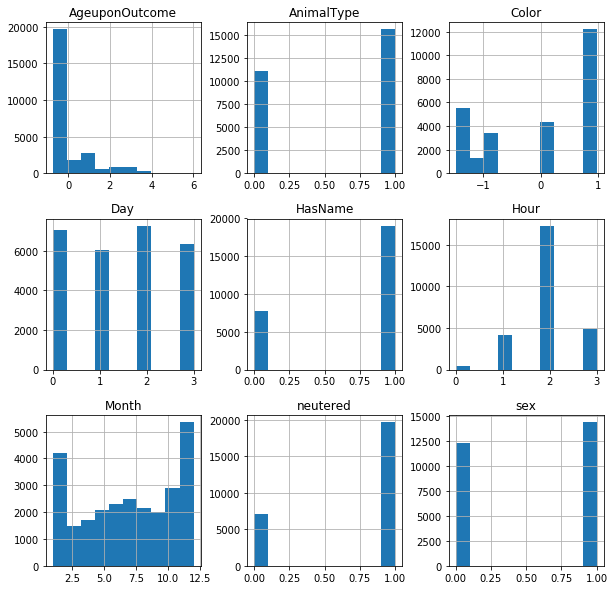

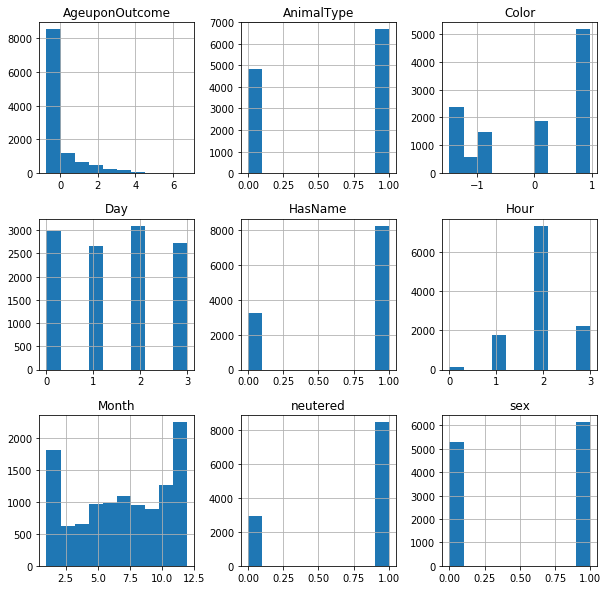

In [123]:
from pandas.plotting import scatter_matrix

#scatter_matrix(X_train, figsize = (15, 15), diagonal='hist')
#scatter_matrix(X_test, figsize = (15, 15), diagonal='hist')

X_train.hist(figsize = (10, 10))
X_test.hist(figsize = (10, 10))

plt.show()

On remarque que les proportions des ensembles de test et d'entraînement sont conservées pour chaque feature. Avec StratifiedKfold, on évite ainsi les situations où certaines valeurs de features seraient moins représentées dans l'ensemble d'entraînement ou de test ce qui dégraderait les performances de la classification.

## Question 16: (1 point)


**Choisir au moins deux modèles permettant la classification multiclasse sur sklearn en plus du modèle implémenté dans la première partie du TP**.

**Complétez la fonction compare qui effectue la crossvalidation pour différents modèles et différentes métriques, et renvoie la liste des moyennes et écart-types pour chacune des métriques, pour chacun des modèles. **

**En vous basant sur les différentes métriques, concluez quant au modèle le plus performant.**

Evaluez les modèles pour les différentes métriques proposées:
* **log loss**: c'est la métrique d'évaluation de kaggle
* **precision**: correspond à la qualité de la prédiction, le nombre de classes correctement prédites par le nombre de prédiction total
* **recall**: le nombre d'éléments appartenant à une classe, identifiés comme tel, divisé par le nombre total des éléments de cette classe.
* **f-score**: une moyenne de la precision et du recall

**Remarque: precision et recall sont deux mesures complémentaires pour l'évaluation d'un modèle de classification multi-classe.**

Dans le cas d'une classification binaire avec un déséquilibre de la classe cible important, (90%/10%), en évaluant le résultat de la classification avec l'accuracy (nombre de prédictions correctes divisé par le nombre de prédictions total), on peut obtenir un très bon score (90% d'accuracy) en choisissant de prédire systématiquement la classe majoritaire.

Dans un tel cas, la precision serait élevée de même, mais le recall serait très bas , nous indiquant la médiocrité de notre modèle.


In [124]:
from sklearn.model_selection import cross_validate
from sklearn import model_selection


def compare(models, X, y, nb_runs):
    losses = []
    scoring = ['neg_log_loss', 'precision_macro','recall_macro','f1_macro']
    
    for m in models:
        losses.append(cross_validate(m, X, y, scoring=scoring, cv = nb_run, return_train_score=False))
    
    return losses

In [125]:
from SoftmaxClassifier import SoftmaxClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

nb_run = 3

models = [
    #SoftmaxClassifier(),
    MLPClassifier(),
    RandomForestClassifier()
]

losses = compare(models,X_train,y_train_label,nb_run)

print(losses)

D:\Programmes\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Programmes\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programmes\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programmes\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programmes\Anaconda\lib\site-packages\sklea

[{'fit_time': array([13.93396807,  9.60647202,  9.34562063]), 'score_time': array([0.06496   , 0.06896043, 0.06496286]), 'test_neg_log_loss': array([-0.86865675, -0.87462891, -0.86425261]), 'test_precision_macro': array([0.47816889, 0.47638853, 0.49184567]), 'test_recall_macro': array([0.40505123, 0.40333618, 0.39613811]), 'test_f1_macro': array([0.41391344, 0.40909759, 0.40381327])}, {'fit_time': array([0.13792109, 0.12893033, 0.13292146]), 'score_time': array([0.11194825, 0.10494232, 0.12791896]), 'test_neg_log_loss': array([-3.8330225 , -3.95535173, -3.72880614]), 'test_precision_macro': array([0.45170378, 0.44902105, 0.45249551]), 'test_recall_macro': array([0.40515087, 0.41333345, 0.41418521]), 'test_f1_macro': array([0.41674492, 0.42440501, 0.42582968])}]


...

## Question 17: Matrice de confusion (0.5 point)

La matrice de confusion A est telle que $A_{i,j}$ correspond au nombre d'exemples de la classe i classifié comme appartenant à la classe j.

Entrainez le modèle sélectionné sur la totalité de l'ensemble d'entraînement.
A l'aide de la matrice de confusion et de la distribution des classes, analysez plus en détail les performances du modèle choisi et justifiez les.

In [126]:
# Train selected model

selected_model = RandomForestClassifier()
selected_model.fit(X_train,y_train_label)
y_pred = selected_model.predict(X_train)

D:\Programmes\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


###### Matrice de confusion

In [127]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_train_label, y_pred), columns = target_label.classes_, index = target_label.classes_)

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Adoption,9997,4,22,419,327
Died,4,167,3,4,19
Euthanasia,92,5,1244,96,118
Return_to_owner,713,1,34,3875,163
Transfer,647,8,64,304,8399


###### Distribution des classes

['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']


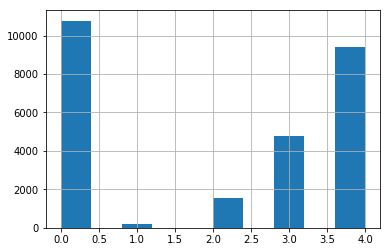

In [128]:
import matplotlib.pyplot as plt 
print(target_label.classes_)
pd.Series(y_train_label).hist()

## Bonus 3: Optimisation des hyper-paramètres (1 point)

Les hyper-paramètres sont les paramètres fixés avant la phase d'apprentissage. Pour optimiser les performances du modèle, on peut sélectionner les meilleurs hyper-paramètres.

A l'aide de sklearn, optimisez les hyper-paramètres du modèle que vous avez sélectionné et montrez que les performances ont été améliorées.
Vous pouvez utiliser par exemple: **GridSearchCV**


In [130]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from SoftmaxClassifier import SoftmaxClassifier
# print(SoftmaxClassifier().get_params().keys())

# après quelques test on remarque plusieurs choses :
# 1) n_epochs ne doit pas être au-dessus de qqs centaines (parfois moins d'une vingtaine pour
# lr=0.1, threshold=0.01 et earlystopping=True
# 2) pour lr=0.1, on fait 2-3 it. avec thres=0.1 (grad=environ 0.2),
#  5-7 it. avec thres=0.01 (grad=env 0.1)
# 15-20 it. avec thres=0.001 (grad= env 0.1)
param_grid = [
    {'alpha': [0.1, 0.01, 0.001], 'n_epochs': [200, 20], 'lr': [0.1, 0.01], 'threshold': [0.01,0.001]}
]
scoring=['neg_log_loss']
# print(SoftmaxClassifier.params())
# , 'precision', 'recall']
gsc = GridSearchCV(SoftmaxClassifier(), param_grid, scoring=scoring, 
             cv=2, n_jobs=None, refit='neg_log_loss')
# print(gsc.best_params_)
gsc = gsc.fit(X_train, y_train_label)
print(gsc.best_params_)

0
7.211515685546225
1
3.337903391352886
diff=
3.8736122941933386
2
2.6934780006003702
diff=
0.6444253907525157
3
2.627519811520976
diff=
0.0659581890793941
4
2.6386473667070756
diff=
-0.011127555186099425
5
2.5500103681390875
diff=
0.08863699856798801
6
2.5238435849358414
diff=
0.02616678320324617
7
2.447757508769233
diff=
0.07608607616660823
8
2.4220077500719173
diff=
0.025749758697315883
9
2.35306524127983
diff=
0.06894250879208741
10
2.327200311791849
diff=
0.025864929487980692
11
2.2673376507311147
diff=
0.05986266106073446
12
2.241536411742036
diff=
0.025801238989078712
13
2.1896741754609512
diff=
0.05186223628108477
14
2.1636411239155056
diff=
0.026033051545445662
15
2.1192592457111905
diff=
0.04438187820431505
16
2.09297841840948
diff=
0.026280827301710552
17
2.055330285049144
diff=
0.03764813336033601
18
2.0288491877559545
diff=
0.02648109729318948
19
1.9972297022935297
diff=
0.03161948546242477
20
1.9706671410921024
diff=
0.026562561201427304
21
1.9443723658449903
diff=
0.0262

5
2.8826034707260377
diff=
0.11177365965519703
6
2.8180696825394307
diff=
0.06453378818660704
7
2.761046711295264
diff=
0.057022971244166776
8
2.707773131839228
diff=
0.05327357945603595
9
2.646291120292754
diff=
0.061482011546473814
10
2.594230065185896
diff=
0.05206105510685832
11
2.538754534337564
diff=
0.0554755308483319
12
2.491162499326718
diff=
0.04759203501084608
13
2.440813487144398
diff=
0.0503490121823198
14
2.397074235848299
diff=
0.04373925129609901
15
2.351723942088305
diff=
0.04535029375999411
16
2.3114354583936025
diff=
0.04028848369470239
17
2.270752260251387
diff=
0.04068319814221555
18
2.2334824086380336
diff=
0.03726985161335339
19
2.197152201846535
diff=
0.036330206791498565
0
3.8442661634536677
1
3.5931948236574383
diff=
0.2510713397962294
2
3.0916496738204113
diff=
0.5015451498370269
3
2.9934903358914804
diff=
0.09815933792893095
4
2.82867878356778
diff=
0.16481155232370037
5
2.742839383974549
diff=
0.08583939959323095
6
2.7011651780625736
diff=
0.041674205911975

68
2.5769655690946127
diff=
0.00654975669275526
69
2.5704560879464795
diff=
0.0065094811481332115
70
2.563986253886573
diff=
0.006469834059906532
71
2.5575554710447825
diff=
0.006430782841790439
72
2.5511631735122373
diff=
0.006392297532545221
73
2.544808822963023
diff=
0.006354350549214516
74
2.5384919064966445
diff=
0.006316916466378331
75
2.53221193467812
diff=
0.006279971818524466
76
2.5259684397557214
diff=
0.006243494922398618
77
2.519760974037982
diff=
0.0062074657177393355
78
2.513589108414349
diff=
0.006171865623632922
79
2.507452431005057
diff=
0.006136677409291913
80
2.50135054592767
diff=
0.00610188507738707
81
2.495283072169129
diff=
0.006067473758541109
82
2.4892496425530473
diff=
0.006033429616081776
83
2.48324990279338
diff=
0.0059997397596673885
84
2.477283510626462
diff=
0.0059663921669179665
85
2.471350135013978
diff=
0.005933375612483971
86
2.4654494554106705
diff=
0.005900679603307424
87
2.4595811610906106
diff=
0.005868294320059864
88
2.4537449505271036
diff=
0.00

36
2.7117674040786754
diff=
0.007833944514384683
37
2.7040068657430485
diff=
0.007760538335626954
38
2.6963171238550316
diff=
0.007689741888016854
39
2.6886957896630532
diff=
0.007621334191978413
40
2.681140670201583
diff=
0.007555119461470028
41
2.6736497464480813
diff=
0.00749092375350191
42
2.6662211543292065
diff=
0.0074285921188748105
43
2.658853168158163
diff=
0.007367986171043395
44
2.651544186153229
diff=
0.007308982004933906
45
2.6442927177433724
diff=
0.007251468409856798
46
2.6370973724127857
diff=
0.007195345330586633
47
2.6299568498742225
diff=
0.007140522538563232
48
2.622869931392776
diff=
0.007086918481446602
49
2.6158354721084267
diff=
0.007034459284349204
50
2.6088523942271595
diff=
0.0069830778812671745
51
2.6019196809699525
diff=
0.006932713257207013
52
2.595036371183905
diff=
0.0068833097860476755
53
2.588201554533578
diff=
0.006834816650326925
54
2.581414367201533
diff=
0.006787187332045086
55
2.574673988036662
diff=
0.006740379164870802
56
2.5679796350974753
diff

3
4.6050979529825735
diff=
0.14440406602296818
4
4.464556156766724
diff=
0.1405417962158495
5
4.327768752283116
diff=
0.13678740448360838
6
4.194750472174659
diff=
0.1330182801084563
7
4.065663911181657
diff=
0.1290865609930023
8
3.9408531063374665
diff=
0.12481080484419049
9
3.820878459624333
diff=
0.11997464671313374
10
3.706542407670751
diff=
0.11433605195358165
11
3.5988878737307197
diff=
0.10765453394003144
12
3.4991430714930596
diff=
0.09974480223766014
13
3.4085849519174474
diff=
0.09055811957561222
14
3.3283135639613786
diff=
0.08027138795606881
15
3.2589793589541234
diff=
0.06933420500725518
16
3.2005641833958998
diff=
0.05841517555822362
17
3.1523284636849054
diff=
0.048235719710994385
18
3.1129635583501605
diff=
0.039364905334744904
19
3.0808754446098954
diff=
0.0320881137402651
0
5.515210166471986
1
5.05301446062266
diff=
0.462195705849326
2
4.636037394193682
diff=
0.416977066428978
3
4.284864629843355
diff=
0.35117276435032707
4
4.0097550949534595
diff=
0.27510953488989554

44
1.476596042941646
diff=
0.0207516707484543
45
1.4918196778912856
diff=
-0.01522363494963952
46
1.4711872568592896
diff=
0.020632421031995918
47
1.4864397996897845
diff=
-0.01525254283049482
48
1.4659424233187772
diff=
0.020497376371007237
49
1.4811985772119818
diff=
-0.01525615389320456
50
1.4608500913726636
diff=
0.020348485839318142
51
1.4760875324871883
diff=
-0.01523744111452463
52
1.4559001449982745
diff=
0.0201873874889138
53
1.4710990784333065
diff=
-0.01519893343503198
54
1.4510836026358505
diff=
0.020015475797455995
55
1.4662264043112192
diff=
-0.015142801675368744
56
1.4463924514439905
diff=
0.019833952867228666
57
1.46146337693509
diff=
-0.015070925491099452
58
1.4418195096136368
diff=
0.01964386732145318
59
1.4568044553928956
diff=
-0.014984945779258796
60
1.4373583114731296
diff=
0.019446143919765957
61
1.4522446173807682
diff=
-0.014886305907638508
62
1.433003011192585
diff=
0.019241606188183047
63
1.4477792955328785
diff=
-0.014776284340293433
64
1.4287483017338993
di

4
1.64502795732656
diff=
0.014450337999067253
5
1.6389193499986228
diff=
0.0061086073279372766
6
1.6303928129954484
diff=
0.008526537003174406
7
1.6294111093630201
diff=
0.0009817036324282213
0
2.399266210682142
1
1.6886941347775282
diff=
0.7105720759046137
2
1.6007729744498822
diff=
0.08792116032764596
3
1.5727511951912192
diff=
0.028021779258663004
4
1.5549378393087356
diff=
0.01781335588248356
5
1.5400302564531105
diff=
0.014907582855625101
6
1.5267350586515023
diff=
0.01329519780160826
7
1.5147196600907922
diff=
0.0120153985607101
8
1.5041058658087851
diff=
0.010613794282007039
9
1.4953699849705613
diff=
0.008735880838223853
10
1.4897635289635012
diff=
0.005606456007060112
11
1.4890891003147841
diff=
0.0006744286487170292
0
3.086772245868966
1
2.794046119044882
diff=
0.2927261268240837
2
2.569367030847284
diff=
0.2246790881975982
3
2.39804549448264
diff=
0.1713215363646441
4
2.2638666254322857
diff=
0.13417886905035425
5
2.155913239317637
diff=
0.10795338611464889
6
2.0682741845432

125
1.4721117427188393
diff=
0.0011334981527342247
126
1.4709861513889237
diff=
0.0011255913299155207
127
1.4698683780584185
diff=
0.0011177733305052229
128
1.4687583352861562
diff=
0.001110042772262343
129
1.467655936975825
diff=
0.0011023983103310986
130
1.4665610983401691
diff=
0.0010948386356559592
131
1.4654737358669752
diff=
0.0010873624731939646
132
1.4643937672864988
diff=
0.0010799685804763204
133
1.463321111540452
diff=
0.0010726557460467578
134
1.4622556887522433
diff=
0.0010654227882087586
135
1.4611974201986062
diff=
0.0010582685536371095
136
1.460146228282381
diff=
0.0010511919162252692
137
1.459102036506515
diff=
0.0010441917758658992
138
1.4580647694490043
diff=
0.0010372670575107268
139
1.4570343527390233
diff=
0.0010304167099810524
140
1.4560107130339062
diff=
0.0010236397051170965
141
1.4549937779970437
diff=
0.0010169350368625096
142
1.4539834762767045
diff=
0.001010301720339113
143
1.4529797374855788
diff=
0.0010037387911256967
144
1.451982492181158
diff=
0.0009972

1
2.172954594039164
diff=
0.1886232705149582
2
2.0341582458812555
diff=
0.13879634815790842
3
1.928352758044383
diff=
0.10580548783687238
4
1.845434288888151
diff=
0.08291846915623213
5
1.779515324641325
diff=
0.06591896424682608
6
1.7268545943395237
diff=
0.052660730301801184
7
1.684717241525028
diff=
0.04213735281449571
8
1.6509131240141572
diff=
0.03380411751087076
9
1.6236387451681935
diff=
0.02727437884596373
10
1.601428874812392
diff=
0.022209870355801575
11
1.5831261830135348
diff=
0.01830269179885713
12
1.5678416885608306
diff=
0.01528449445270419
13
1.5549067594536568
diff=
0.012934929107173865
14
1.5438243985557487
diff=
0.011082360897908039
15
1.5342259512573535
diff=
0.009598447298395207
0
3.728171144635823
1
3.441816278201755
diff=
0.2863548664340678
2
3.1897605498121413
diff=
0.2520557283896139
3
2.970875709139917
diff=
0.21888484067222436
4
2.7822829459801026
diff=
0.18859276315981433
5
2.619736320964446
diff=
0.16254662501565642
6
2.4786569950270456
diff=
0.141079325937

1
2.097333890195203
diff=
0.2295426545640229
2
1.9324380827673582
diff=
0.16489580742784504
3
1.8167189992665602
diff=
0.11571908350079796
4
1.7345813548732643
diff=
0.08213764439329596
5
1.6748112065641305
diff=
0.05977014830913374
6
1.630385551310026
diff=
0.04442565525410447
7
1.5969491589889753
diff=
0.03343639232105078
8
1.571628952144433
diff=
0.02532020684454217
9
1.5523812855175183
diff=
0.019247666626914794
10
1.5376782978564658
diff=
0.014702987661052491
11
1.526357458188472
diff=
0.011320839667993798
12
1.5175371910417725
diff=
0.008820267146699479
13
1.5105570634501988
diff=
0.006980127591573737
14
1.5049288779164633
diff=
0.0056281855337354525
15
1.5002956677209902
diff=
0.004633210195473136
16
1.496398271368705
diff=
0.003897396352285254
17
1.4930491273007171
diff=
0.003349144067987808
18
1.490112430339385
diff=
0.0029366969613322524
19
1.4874895037652458
diff=
0.002622926574139095
20
1.4851082205140436
diff=
0.0023812832512022375
21
1.4829154475162782
diff=
0.00219277299

82
1.3387383305344536
diff=
0.0013351458858759102
83
1.3374151043119018
diff=
0.0013232262225517655
84
1.3361036142457494
diff=
0.0013114900661523876
85
1.3348036823324994
diff=
0.001299931913250063
86
1.3335151357711408
diff=
0.0012885465613585723
87
1.3322378066842315
diff=
0.0012773290869092513
88
1.3309715318594078
diff=
0.0012662748248237765
89
1.3297161525092105
diff=
0.001255379350197261
90
1.328471514048086
diff=
0.0012446384611244365
91
1.3272374658850006
diff=
0.0012340481630854772
92
1.3260138612303594
diff=
0.0012236046546412194
93
1.324800556916177
diff=
0.0012133043141824285
94
1.3235974132284174
diff=
0.0012031436877595336
95
1.3224042937504807
diff=
0.001193119477936655
96
1.3212210652170753
diff=
0.001183228533405467
97
1.3200475973775452
diff=
0.0011734678395300957
98
1.3188837628679855
diff=
0.0011638345095597025
99
1.3177294370915695
diff=
0.0011543257764159431
100
1.316584498106222
diff=
0.00114493898534751
101
1.3154488265193256
diff=
0.0011356715868964251
102
1.3

63
2.440382746318288
diff=
0.006811826637874496
64
2.433616541775396
diff=
0.006766204542892229
65
2.4268954826183715
diff=
0.006721059157024367
66
2.4202191112399936
diff=
0.006676371378377954
67
2.4135869872478435
diff=
0.006632123992150074
68
2.406998685807757
diff=
0.006588301440086486
69
2.4004537961860075
diff=
0.006544889621749483
70
2.393951920462416
diff=
0.00650187572359151
71
2.3874926723912866
diff=
0.006459248071129409
72
2.3810756763909176
diff=
0.006416996000369046
73
2.3747005666447096
diff=
0.006375109746207919
74
2.368366986299572
diff=
0.006333580345137424
75
2.3620745867501247
diff=
0.006292399549447492
76
2.3558230269974207
diff=
0.006251559752703972
77
2.349611973074134
diff=
0.006211053923286691
78
2.3434410975277715
diff=
0.006170875546362531
79
2.3373100789557086
diff=
0.006131018572062885
80
2.3312186015860785
diff=
0.006091477369630116
81
2.32516635489946
diff=
0.006052246686618634
82
2.319153033286981
diff=
0.006013321612478695
83
2.313178335740944
diff=
0.0

## Question 18: Soumission (0.5 point)

Enfin, effectuez la prédiction sur l'ensemble de test et joignez vos résultats au rendu du TP.

**Optionnel**: Vous pouvez soumettre vos résultats sur kaggle et noter votre performance en terme de log loss.

In [41]:
best_model = 
pred_test = pd.Series(best_model.transform(X_test))
pred_test.to_csv("test_prediction.csv",index = False)

AttributeError: 'SoftmaxClassifier' object has no attribute 'transform'